![training](assets/training-basics/puppy-training.jpg)

(image: amazon)

# Training basics

Concepts in training models
- Loss functions
- Gradient descent
- Overfitting, underfitting
- Regularization
- Cross-validation

Objective: a model that trains fast and performs well

Not an exhaustive list. We'll encounter more as we go over the different algorithms.

## 1. Loss Functions

What they are: a metric of how far away the predictions are from the truth

For example:

![MSE](http://scikit-learn.org/stable/_images/math/44f36557fef9b30b077b21550490a1b9a0ade154.png)

a.k.a.:
- Objective function
- Cost function
- Error function

### Definitions

$$x^* = \arg \min L(x)$$

where $x^*$ = value that minimizes the loss function $L(x)$

The process of finding $x^*$ is called "Optimization". It usually involves running some type of Gradient Descent. 

### Loss Function Examples

Scikit-learn:
- [Mean squared error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): `sklearn.metrics.mean_squared_error(y_true, y_pred)`
- [Log loss](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss): `sklearn.metrics.log_loss(y_true, y_pred)`
- [Zero one loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss)
`sklearn.metrics.zero_one_loss(y_true, y_pred)`
- etc

Keras:
- https://keras.io/losses/
- `keras.losses.mean_squared_error(y_true, y_pred)`
- `keras.losses.binary_crossentropy(y_true, y_pred)`
- etc

## 2. Gradient Descent

What it is: technique for minimizing loss function for a given model

Objective: find $w^*$ such that $$w^* = \underset{w}\arg \min{L\big(y_{true}, y_{pred}\big)}$$

$$w^* = \underset{w}\arg \min{L\big(y_{true}, f(x, w)\big)}$$


where
- $L(...)$ is the loss function
- $w$ are the weights
- $f(x, w)$ is the model that computes $y_{pred}$

### Gradient descent algorithm

1. Initialize $w$ to some value (e.g. random)
2. Compute gradient of $L\big(y_{true}, f(x, w)\big)$
3. Update $w$ by a "tiny factor" in the negative of the gradient
4. Repeat 2-3 until we reach the "stopping criteria" (more on this later)

The "tiny factor" is known as the "learning rate"

### Workshop: Gradient descent. Animated

![wake up](assets/training-basics/descend.jpg)

(training incantation)

### Environment Setup

Create a new environment called `mldds02`. You may also reuse `mldds01`, but it's good to keep separate environments for different experiments.

```
conda create -n mldds02 python=3
conda activate mldds02

(mldds02) conda install jupyter numpy pandas matplotlib scikit-learn
(mldds02) conda install -c conda-forge ffmpeg
```

In [ ]:
# Credits: https://jed-ai.github.io/py1_gd_animation/

import numpy as np
import matplotlib.pyplot as plt

"""Example gradient descent implementation"""

def func_y(x):
    """A demonstrative loss function that happens to be convex (has global a minimum)
    Args:
        x - the input (can be the weights of a machine learning algorithm)
    Returns:
        The loss value
    """
    return x**2 - 4*x + 2

def gradient_func_y(x):
    """The gradient of func_y
    Args:
        x - the input
    Returns:
        The gradient value
    """
    return 2*x - 4 # d(x^2 - 4x + 2)/dx = 2x - 4

def gradient_descent(previous_x, learning_rate, epochs):
    """An implementation of gradient descent
    Args:
        previous_x - the previous input value
        learning_rate - how much to change x per iteration
        epochs - number of steps to run gradient descent
    Returns:
        A tuple: array of x values, array of loss values
    """
    x_gd = []
    y_gd = []
    x_gd.append(previous_x)
    y_gd.append(func_y(previous_x))
    
    # loop to update x and y
    for i in range(epochs):
        # x = lr * gradient(func(prev_x))
        update = learning_rate *gradient_func_y(previous_x)
        x = previous_x - update
        print('step', i, 'previous x', previous_x,
              'update:', -update, 'new x:', x)
        x_gd.append(x)
        y_gd.append(func_y(x))
        
        # update previous_x
        previous_x = x
    
    return x_gd, y_gd

With gradient descent implemented, we'll will now run it.

In [ ]:
x0 = 0.7
learning_rate = 0.15
epochs = 10

x = np.arange(-1, 5, 0.01)
y = func_y(x)
x_gd, y_gd = gradient_descent(x0, learning_rate, epochs)

Plot the animation.

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y)-1, max(y)+1])
ax.plot(x, y, lw = 0.9, color = 'k')

line, = ax.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax.plot([], [], 'bo', animated=True)
value_display = ax.text(0.02, 0.02, '', transform=ax.transAxes)

def init():
    """Initializes the animation"""
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate(i):
    """Animates the plot at step i
    Args:
        i: the step to animate
        return: a tuple of line, point, and value_display
    """
    # Animate line
    line.set_data(x_gd[:i], y_gd[:i])
    
    # Animate points
    point.set_data(x_gd[i], y_gd[i])

    # Animate value display
    value_display.set_text('Min = ' + str(y_gd[i]))

    return line, point, value_display

# call the animator
rc('animation', html='html5')
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=len(x_gd), interval=360,
                     repeat_delay=60, blit=True)

# display the video
HTML(anim.to_html5_video())

### Exercises

1. Try initializing x0 to something > 2, what do you observe?
2. Try increasing the learning_rate to something large like 10. Does the gradient still converge?
3. Replace func_y and gradient_func_y above with a cubic function. What do you observe?
  ```
  y = x^3 - 5x^2 + x + 1
  gradient(y) = 3x^2 - 10x + 1
  ```
4. Replace func_y and gradient_func_y with `cos(x)` and its derivative `-sin(x)`. What do you observe?  What needs to reach convergence?
  ```
  y = np.tan(x)
  gradient(y) = -np.sin(x)
  ```
  
Derivative formulas: https://www.derivative-calculator.net/

### Gradient Descent Variants

1. Stochastic Gradient Descent (SGD)
2. Minibatch SGD
3. Minibatch SGD with Momentum
4. Adaptive Learning Rates

### Stochastic Gradient Descent

"Regular" Gradient Descent is expensive because it processes all samples at once
- Imagine you have millions of training samples

Stochastic Gradient Descent speeds this up by:
- Running gradient descent, one randomly selected training sample at a time
- Stochastic: random noise, because samples can vary a lot

### Notation

$\leftarrow$ = replace value
Some texts use this symbol $:=$

Examples
- $\theta \leftarrow \theta - \epsilon g$
- $\theta := \theta - \epsilon g$

Means
1. Compute $\theta' = \theta - \epsilon g$
2. Update $\theta = \theta'$

![sgd](assets/training-basics/sgd.png)

Symbols:
- The $\eta_t$ denotes the learning rate
- Note: $\Theta$ is denotes the weights matrix

(image: Neural Networks in Natural Language Processing, Goldberg, 2017)

### Minibatch Stochastic Gradient Descent

Instead of 1 random sample at a time:
- Sample a "minibatch" of m training samples
- Run gradient descent on that minibatch
- "Smooths" out the randomness by operating on a minibatch.
- The minibatch size can be tuned ("hyperparameter")

![minibatch sgd](assets/training-basics/minibatch-sgd.png)

Symbols:
- $\epsilon_k$ denotes the learning rate
- $\theta$ denotes the weights matrix
- $\nabla_{\theta}$ means gradient w.r.t. $\theta$

(image: Deep Learning, Goodfellow, 2016)

### Minibatch SGD, with momentum

Speeds up minibatch SGD by:
- Applying an exponentially decaying moving average of the previous gradients ($v$)
  - if gradients point the same way, will reach minimum faster
- Minibatch SGD: $\theta \leftarrow \theta - \epsilon g$
- Minibatch SGD + momentum: $\theta \leftarrow \theta - \epsilon g + \alpha v$, $v \leftarrow v - \epsilon g$

Variant: Nesterov's momentum

![minibatch sgd with momentum](assets/training-basics/minibatch-sgd-momentum.png)

(image: Deep Learning, Goodfellow, 2016)

### Adaptive Learning Rate Strategies

- Learning rate will control the amount of gradient update
  - Large learning rate: risk overshoot and not converge
  - Small learning rate: too slow
  - Ideal: start large(r), then reduce as we get closer to minima
- Strategies
  - Constant learning rate
  - Time-based or step-based decay
  - AdaGrad
  - RMSProp
  - Adam
- What works best depends on your domain (true for **any** optimization)

![Comparison](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png)

(image: [machine learning mastery](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning)

![Another comparison](http://scikit-learn.org/stable/_images/sphx_glr_plot_mlp_training_curves_001.png)

(image: [scikit-learn](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html))

## Overfitting and Underfitting

- Overfitting: High variance
- Underfitting: High bias

![creativity](http://blog.algotrading101.com/wp-content/uploads/2016/01/overfitting-comics.jpg)

(image: algotrading101)

![comics](https://imgs.xkcd.com/comics/linear_regression.png)

(image: xkcd)

### Generalization

- Model is trained based on the training set
- Generalization is evaluated on the test set

Generalization: "How well does model work, on inputs not seen during training"

### Goals of training
1. Minimize training error
2. Minimize gap between test error and training error. (the "generalization gap")

(Test error is almost always higher than training error)

### Underfitting, Overfitting

1. A model is set to "underfit" if the training error is too large
2. A model is set to "overfit" if the gap between test and training error is too large

A good-fit model: neither underfit nor overfit. (like Goldilocks and the Three Bears)

### Underfit

A model is set to "underfit" if the training error is too large
  - Means model does not work
  - It learnt nothing
  - Mode has "high bias"

### Overfit

A model is set to "overfit" if the gap between test and training error is too large
  - Means model does not generalize well
  - It only learnt the training set (or learnt too much training set noise)
  - Model has "high variance"

### How to fix Underfitting

Symptom: model did not train well

Potential cures:
- More data
- More features and/or different features
- Different algorithms

### How to fix Overfitting

Symptom: model trained well, but did not test well

Potential cures:
- Early stoppping
- Fewer features
- Regularization
- Cross Validation

## Workshop: SGD, Overfitting, Underfitting

In this workshop, we will try to fit a more complex linear regression model.

We'll explore the following concepts:
- Loss functions
- Stochastic Gradient Descent
- Underfitting and Overfitting


### Prediction Task

We'll try to fit a curve to predict, for recent Singapore University Graduates:

Y: Gross Monthly Median Salary

X:
- Overall Employment Rate
- University

### Dataset(s)

1. Download this dataset: https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-sutd
2. Unzip it and note the path for use in `pandas.read_csv`

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor

### 1. Data Transformation and Cleaning

The first step is to inspect the data to see what transformation/cleaning is needed.

In [52]:
# ISO-8859-1 encoding is needed
#   UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 20: invalid continuation byte

df = pd.read_csv('D:/tmp/graduate-employment-survey-ntu-nus-sit-smu-sutd/graduate-employment-survey-ntu-nus-sit-smu-sutd.csv',
                 encoding='ISO-8859-1')

df.columns

Index(['year', 'university', 'school', 'degree', 'employment_rate_overall',
       'employment_rate_permanent', 'basic_monthly_mean',
       'basic_monthly_median', 'gross_monthly_mean', 'gross_monthly_median',
       'gross_mthly_25_percentile', 'gross_mthly_75_percentile'],
      dtype='object')

The columns to inspect are:
- university
- employment_rate_overall
- gross_monthly_median

We are looking for:
- invalid values
- data types to transform to numeric

In [50]:
df.university.unique()

array(['Nanyang Technological University',
       'National University of Singapore',
       'Singapore Management University',
       'Singapore Institute of Technology',
       'Singapore University of Technology and Design'], dtype=object)

`university` column
- no invalid values: OK
- data type is object (these are string values)
  - need to transform to numbers
  - How: use [pandas.Series.str.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.get_dummies.html#pandas.Series.str.get_dummies) to convert to dummy indicator columns

In [56]:
df.university.str.get_dummies().head()

,Nanyang Technological University,National University of Singapore,Singapore Institute of Technology,Singapore Management University,Singapore University of Technology and Design
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [51]:
df.employment_rate_overall.unique()

array(['97.4', '97.1', '90.9', '87.5', '95.3', '81.3', '87.3', '90.3',
       '94.8', '92.1', '91', '84', '85.7', '82.5', '91.6', '95.6', '81.6',
       '85.1', '89.4', '89.9', '82.7', '90.6', '82.4', '74.4', 'na',
       '90.7', '78.6', '79.8', '86', '80.8', '68.2', '100', '84.8',
       '86.6', '88.1', '88.7', '94.6', '93.3', '97.2', '88.9', '92.4',
       '89.2', '82.1', '96.8', '74', '93.2', '96.1', '88.5', '86.2',
       '93.8', '93.9', '89.1', '98.8', '97.5', '97.3', '80.9', '83.6',
       '96.4', '94.2', '95.2', '95.9', '94', '93.6', '86.5', '98.2',
       '96.6', '89.6', '92.9', '84.6', '83.8', '91.4', '94.5', '90.2',
       '92.5', '80', '86.8', '86.7', '87', '66.7', '73.2', '75.1', '80.5',
       '88.4', '91.3', '73.7', '87.9', '81.9', '83.1', '94.4', '95.5',
       '98.4', '77.3', '93.1', '83.9', '96.5', '90', '76.8', '98.9',
       '97.8', '97.7', '90.1', '92.6', '75', '89.3', '88', '92.3', '93',
       '88.8', '98.6', '92.2', '88.6', '89.7', '82.9', '95', '79.3',
       '8

`employment_rate_overall` column
- invalid values: yes, there is an 'na' value above
- data type is object (these are string values)
  - need to transform to numbers
  - How: use [pandas.to_numeric](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html) to convert to numbers

If the dataset is large, it is hard to find the 'na' values.

A quick test is to try converting the column first, to see if errors appear.

In [80]:
pd.to_numeric(df.employment_rate_overall) # see if we get parse errors

ValueError: Unable to parse string "na" at position 24

We will be using the `errors='coerce'` option in [pandas.to_numeric](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html) when we do the actual conversion.

In [58]:
pd.to_numeric(df.employment_rate_overall, errors='coerce') # 'na' becomes NaN

0       97.4
1       97.1
2       90.9
3       87.5
4       95.3
5       81.3
6       87.3
7       90.3
8       94.8
9       92.1
10      91.0
11      84.0
12      85.7
13      82.5
14      91.6
15      95.6
16      81.6
17      85.1
18      89.4
19      89.9
20      82.7
21      90.6
22      82.4
23      74.4
24       NaN
25      90.7
26      78.6
27      79.8
28       NaN
29      86.0
       ...  
259    100.0
260     83.3
261     96.9
262    100.0
263     97.3
264    100.0
265     82.4
266      NaN
267     85.2
268     84.3
269     83.9
270      NaN
271     99.0
272     71.9
273     97.3
274     97.7
275     93.9
276     98.3
277     90.3
278     98.2
279     94.8
280     97.4
281     89.0
282     93.1
283     99.0
284    100.0
285     92.5
286     80.3
287     86.0
288      NaN
Name: employment_rate_overall, Length: 289, dtype: float64

The `gross_monthly_median` column is handled the same way.

Let's now perform the data transformation and cleaning.

In [82]:
# transform string to numbers, forcing invalid values to float NaN
data = {
    'university': df.university, # keep the category strings around for plotting
    'employment_rate_overall': 
        pd.to_numeric(df.employment_rate_overall, errors='coerce'),
    'gross_monthly_median': 
        pd.to_numeric(df.gross_monthly_median, errors='coerce')
}

df_dataset = pd.DataFrame(data)

# join the indicator columns, drop the NaNs
df_dataset = df_dataset.join(df.university.str.get_dummies()).dropna()

# rename the indicator columns so that they are easier to reference later
df_dataset.rename(columns={
    # old column : new column
    'Nanyang Technological University': 'NTU',
    'National University of Singapore': 'NUS',
    'Singapore Institute of Technology': 'SIT',
    'Singapore Management University': 'SMU',
    'Singapore University of Technology and Design': 'SUTD'
}, inplace=True)

df_dataset.head()

,university,employment_rate_overall,gross_monthly_median,NTU,NUS,SIT,SMU,SUTD
0,Nanyang Technological University,97.4,3350.0,1,0,0,0,0
1,Nanyang Technological University,97.1,2700.0,1,0,0,0,0
2,Nanyang Technological University,90.9,3000.0,1,0,0,0,0
3,Nanyang Technological University,87.5,3400.0,1,0,0,0,0
4,Nanyang Technological University,95.3,3500.0,1,0,0,0,0


### Visualize Dataset
Let's plot the dataset to visualize our data.

Although we have 3 axes (Y, X1, X2), we won't do a 3-D plot, because the indicator columns only have 2 possible values (1 or 0).

So we do a 2-D plot with different markers for `university`.
- This is why we added the `university` column along with the dummy columns.

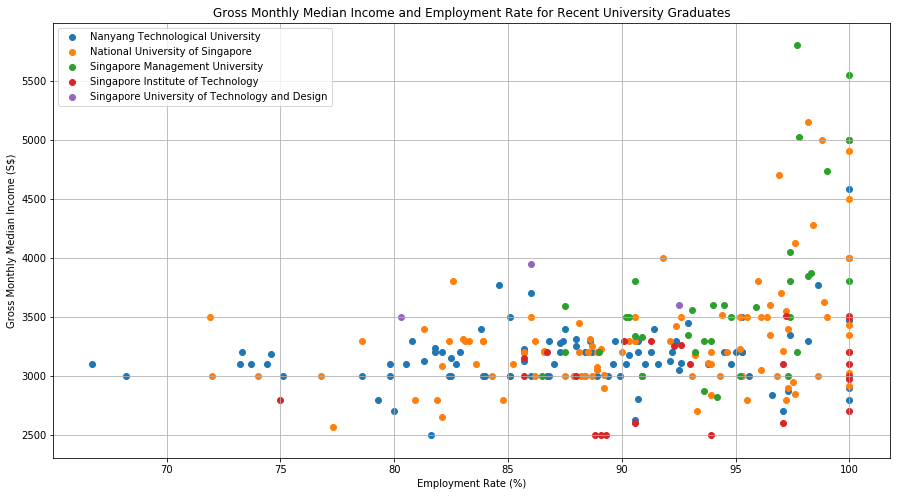

In [83]:
fig, ax = plt.subplots(figsize=(15, 8))

for u in df_dataset.university.unique():
    temp = df_dataset.loc[df_dataset.university==u]
    ax.scatter(temp.employment_rate_overall, temp.gross_monthly_median, label=u)

ax.set(title='Gross Monthly Median Income and Employment Rate for Recent University Graduates',
       xlabel='Employment Rate (%)',
       ylabel='Gross Monthly Median Income (S$)')
ax.grid()
ax.legend()

### 2. Feature selection
    
#### Inputs

|Feature|Description|Column name|Transformation before model input?|
|--|--|--|
|$x_1$|Overall Employment Rate (%)|employment_rate_overall|pd.to_numeric|
|$x_2$|Is NTU graduate|NTU|str.get_dummies()|
|$x_3$|Is NUS graduate|NTU|str.get_dummies()|
|$x_4$|Is SIT graduate|NTU|str.get_dummies()|
|$x_5$|Is SMU graduate|NTU|str.get_dummies()|
|$x_6$|Is SUTD graduate|NTU|str.get_dummies()|

#### Outputs

|Output|Description|Truth column|Transformation from model output?|
|--|--|--|
|$\hat{y}$|Predicted Gross Monthly Medium Income S\$|$y$ = gross_monthly_median|None, output will stay numeric|

#### Other candidate features

Based on the plot above, we have a few more feature options that may give us a more accurate model

1. Degree Type: transform the `degree` column into a common degree type (such as Bachelor of Science)
2. School: similar to degree type (transform into a common school type, such as Medicine, Engineering)

Due to time constraints, we won't cover in this workshop. You can try these as an exercise in your own time.

## Regularization

## Cross Validation

### Reading List

|Material|Read it for|URL|
|--|--|--|
|Chapter 8, Pages 290-296|Stochastic Gradient Descent Theory|http://www.deeplearningbook.org/contents/optimization.html|
|Chapter 5, Pages 107-119|Capacity, Overfitting and Underfitting|http://www.deeplearningbook.org/contents/ml.html|

Note: in the book, the section on SGD is actually talking about "Minibatch SGD"